# What impact does education have on income? Exploring the GDP of Ekiti State

## Goal: We often here that Ekiti state is the most educated state in Nigeria, has the most professors and quite highly educated. However, cursory glance at the data shows that the per capita income of people in Ekiti state is quite low. This project is a task to investigate if education really has an impact on income or if there are other factors that account for the low per capita income in the state. On Observation, the GNI of Ekiti state seems much smaller than those of other states. Project is to see if a machine learning model, with all other state data staying the same, can predict the should be GNI of the state.

https://www.qs.com/what-effect-does-education-level-have-on-wealth

# 

## Data Preparation

In [106]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
url = "https://en.wikipedia.org/wiki/List_of_Nigerian_states_by_Human_Development_Index"

In [130]:
tables = pd.read_html(url)

In [131]:
# Save 2 needed tables to dataframes

data2019 = tables[0]
data2016 = tables[1]

In [132]:
# Clean up dataset

# Drop rank
data2016 = data2016.drop('Rank',axis=1)

# Drop Nigera (Total) & Drop Ekiti (Target Answer)
data2016 = data2016.drop([15])

In [133]:
data2016.columns

Index(['State', 'HDI (2016)', 'Longevity Index', 'Education Index',
       'GNI per capita(in USD)'],
      dtype='object')

In [134]:
data2016 = data2016.rename({'HDI (2016)':'HDI','GNI per capita(in USD)':'GNI'},axis=1)

In [137]:
#data2019.columns

In [80]:
#data2019.head()

In [138]:
# Drop column multi index

data2019.columns = data2019.columns.droplevel(1)

In [139]:
# Rename header column names

data2019 = data2019.rename({'HDI (2019)':'HDI','Comparable countries (2019)[2]':'Comparable countries'},axis=1)

In [140]:
# Drop unnecessary rows

data2019 = data2019.drop([23,24])

In [141]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 37
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            37 non-null     object 
 1   HDI              37 non-null     float64
 2   Longevity Index  37 non-null     float64
 3   Education Index  37 non-null     float64
 4   GNI              37 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [142]:
data2016.describe()

,HDI,Longevity Index,Education Index,GNI
count,37.000000,37.000000,37.000000,37.000000
mean,0.464297,0.460568,0.716757,1655.405405
std,0.095250,0.047090,0.199280,1688.888728
min,0.291000,0.364000,0.330000,400.000000
25%,0.399000,0.427000,0.560000,851.000000
50%,0.463000,0.475000,0.780000,1113.000000
75%,0.541000,0.506000,0.881000,1798.000000
max,0.652000,0.538000,1.007000,8174.000000


In [143]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  37 non-null     object
 1   State                 37 non-null     object
 2   HDI                   37 non-null     object
 3   Comparable countries  37 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [144]:
data2019.describe()

,Rank,State,HDI,Comparable countries
count,37,37,37,37
unique,31,37,33,21
top,13,Lagos,0.619,Bhutan
freq,3,1,3,5


# 

## Visualizing the Data

In [145]:
data2016.head()

,State,HDI,Longevity Index,Education Index,GNI
0,Lagos,0.652,0.459,1.007,7972
1,Federal Capital Territory,0.629,0.506,0.815,8174
2,Bayelsa,0.591,0.475,0.926,3441
3,Akwa Ibom,0.564,0.491,0.905,2259
4,Ekiti,0.561,0.522,0.894,1898


In [146]:
data2016.describe()

,HDI,Longevity Index,Education Index,GNI
count,37.000000,37.000000,37.000000,37.000000
mean,0.464297,0.460568,0.716757,1655.405405
std,0.095250,0.047090,0.199280,1688.888728
min,0.291000,0.364000,0.330000,400.000000
25%,0.399000,0.427000,0.560000,851.000000
50%,0.463000,0.475000,0.780000,1113.000000
75%,0.541000,0.506000,0.881000,1798.000000
max,0.652000,0.538000,1.007000,8174.000000


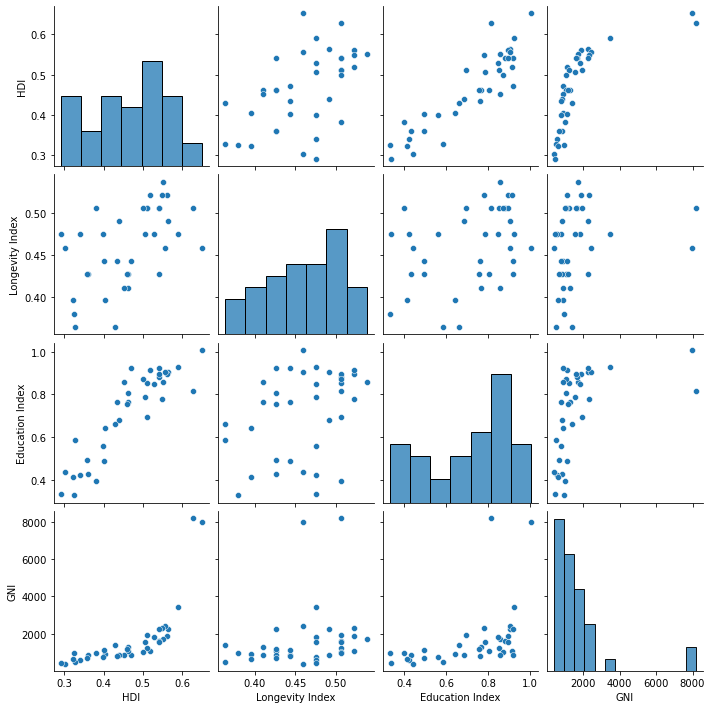

In [147]:
sns.pairplot(data2016)

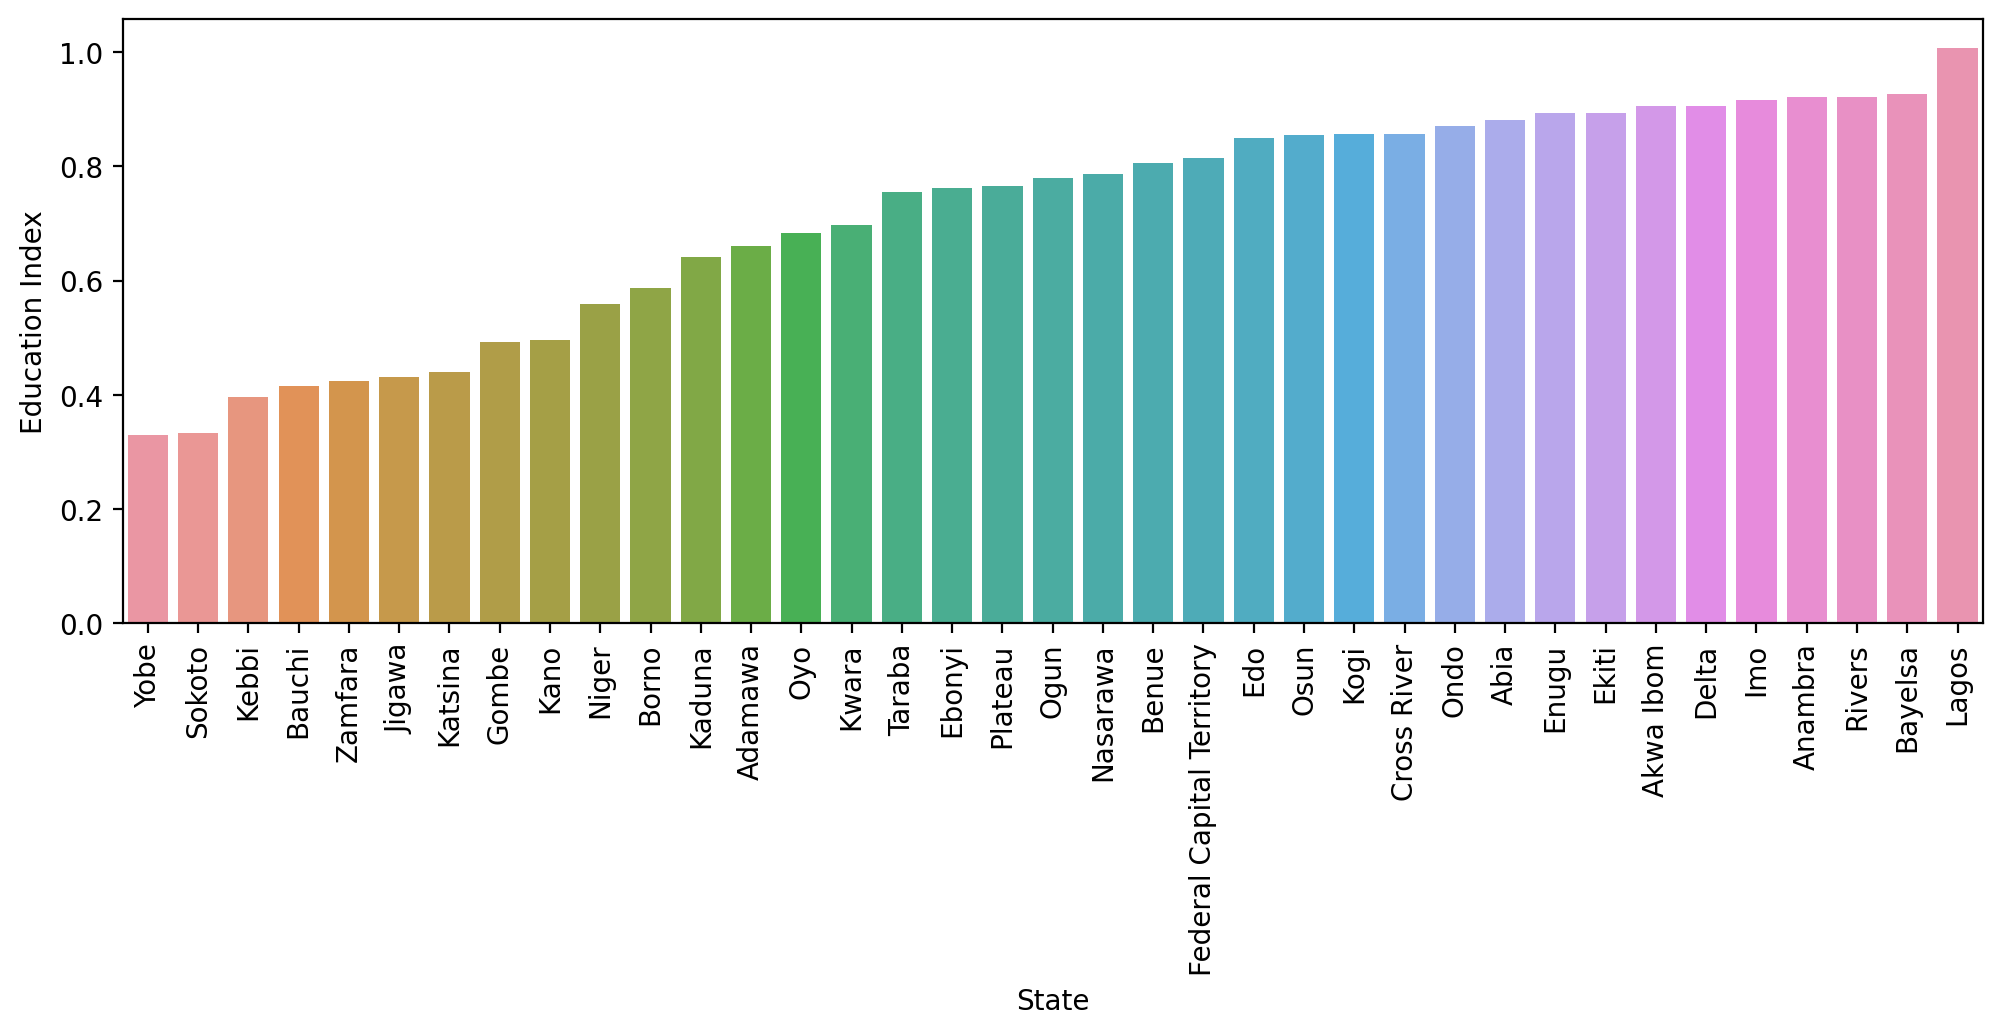

In [176]:
df = data2016.sort_values("Education Index")
plt.figure(dpi=200,figsize=(12,4))

sns.barplot(data=df,x='State',y='Education Index')
plt.xticks(rotation=90)
plt.show;

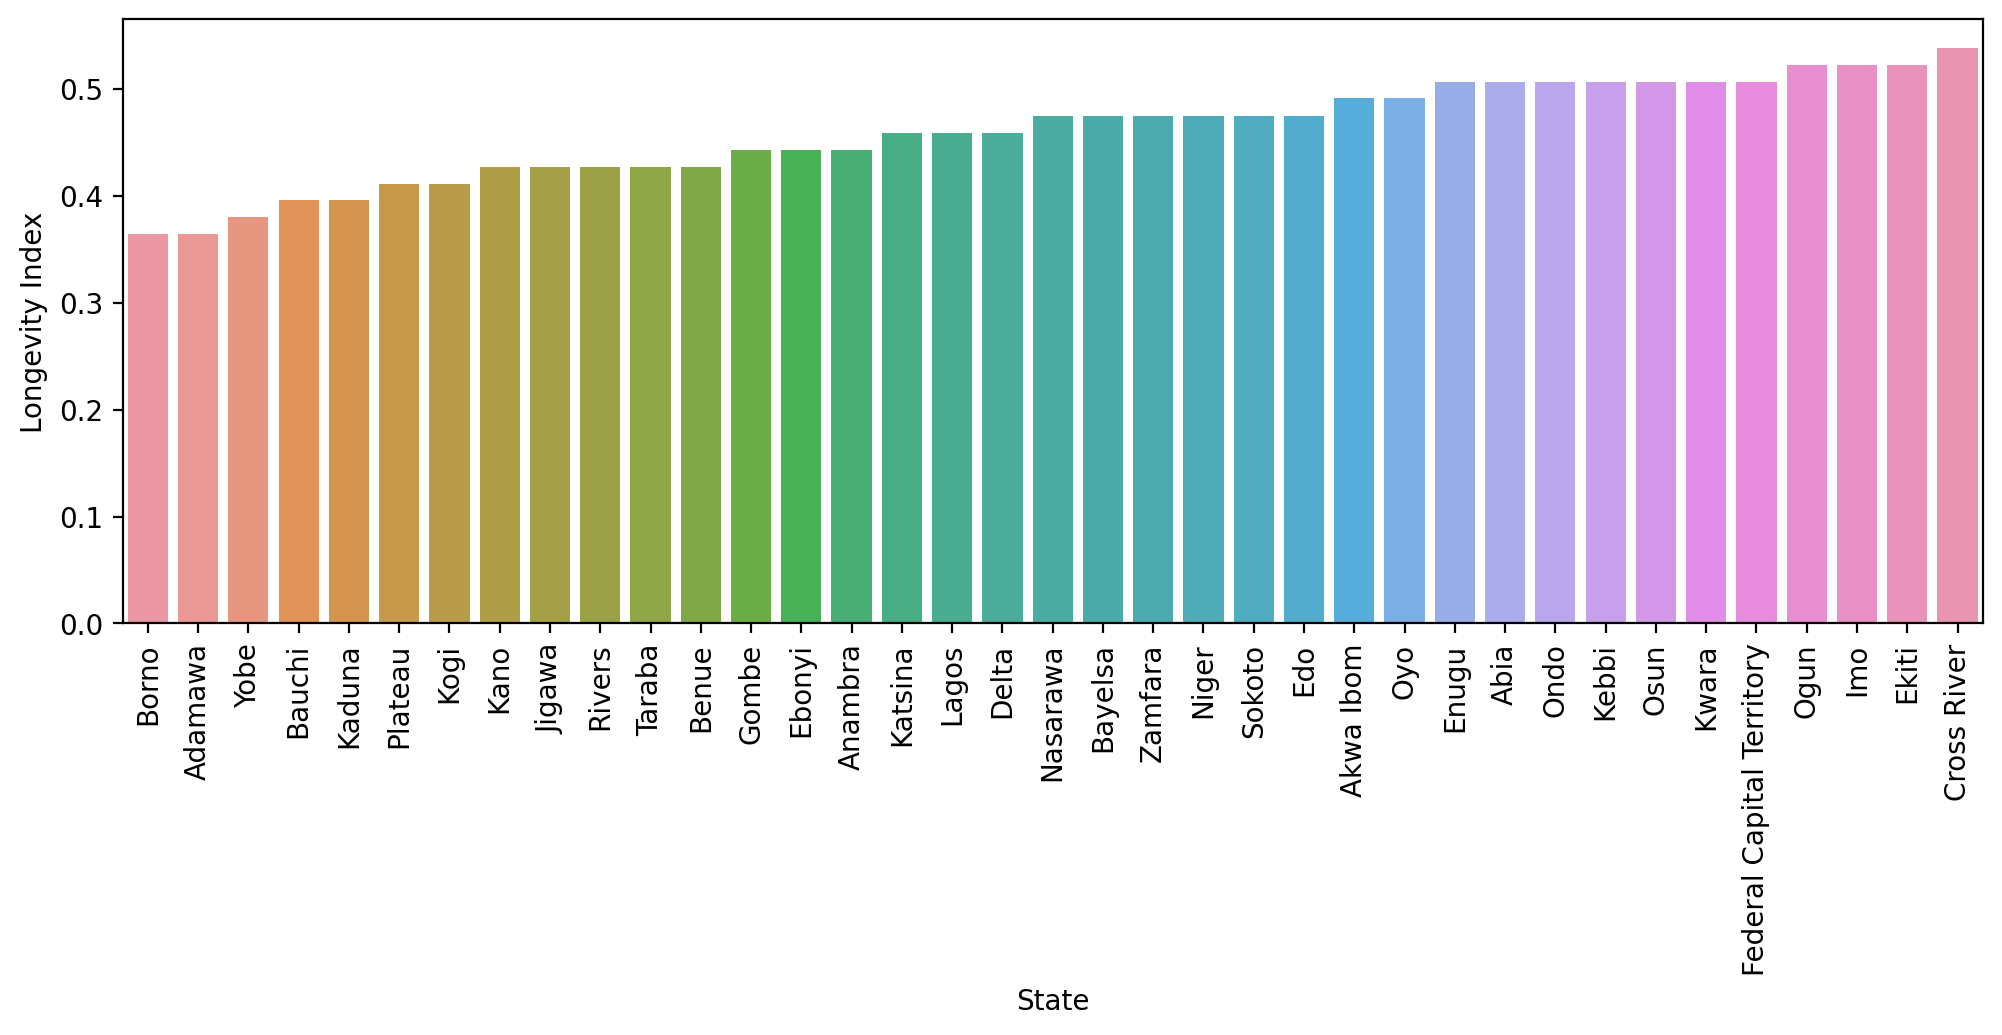

In [152]:
df = data2016.sort_values("Longevity Index")

plt.figure(dpi=200,figsize=(12,4))

sns.barplot(data=df,x='State',y='Longevity Index')
plt.xticks(rotation=90)
plt.show;

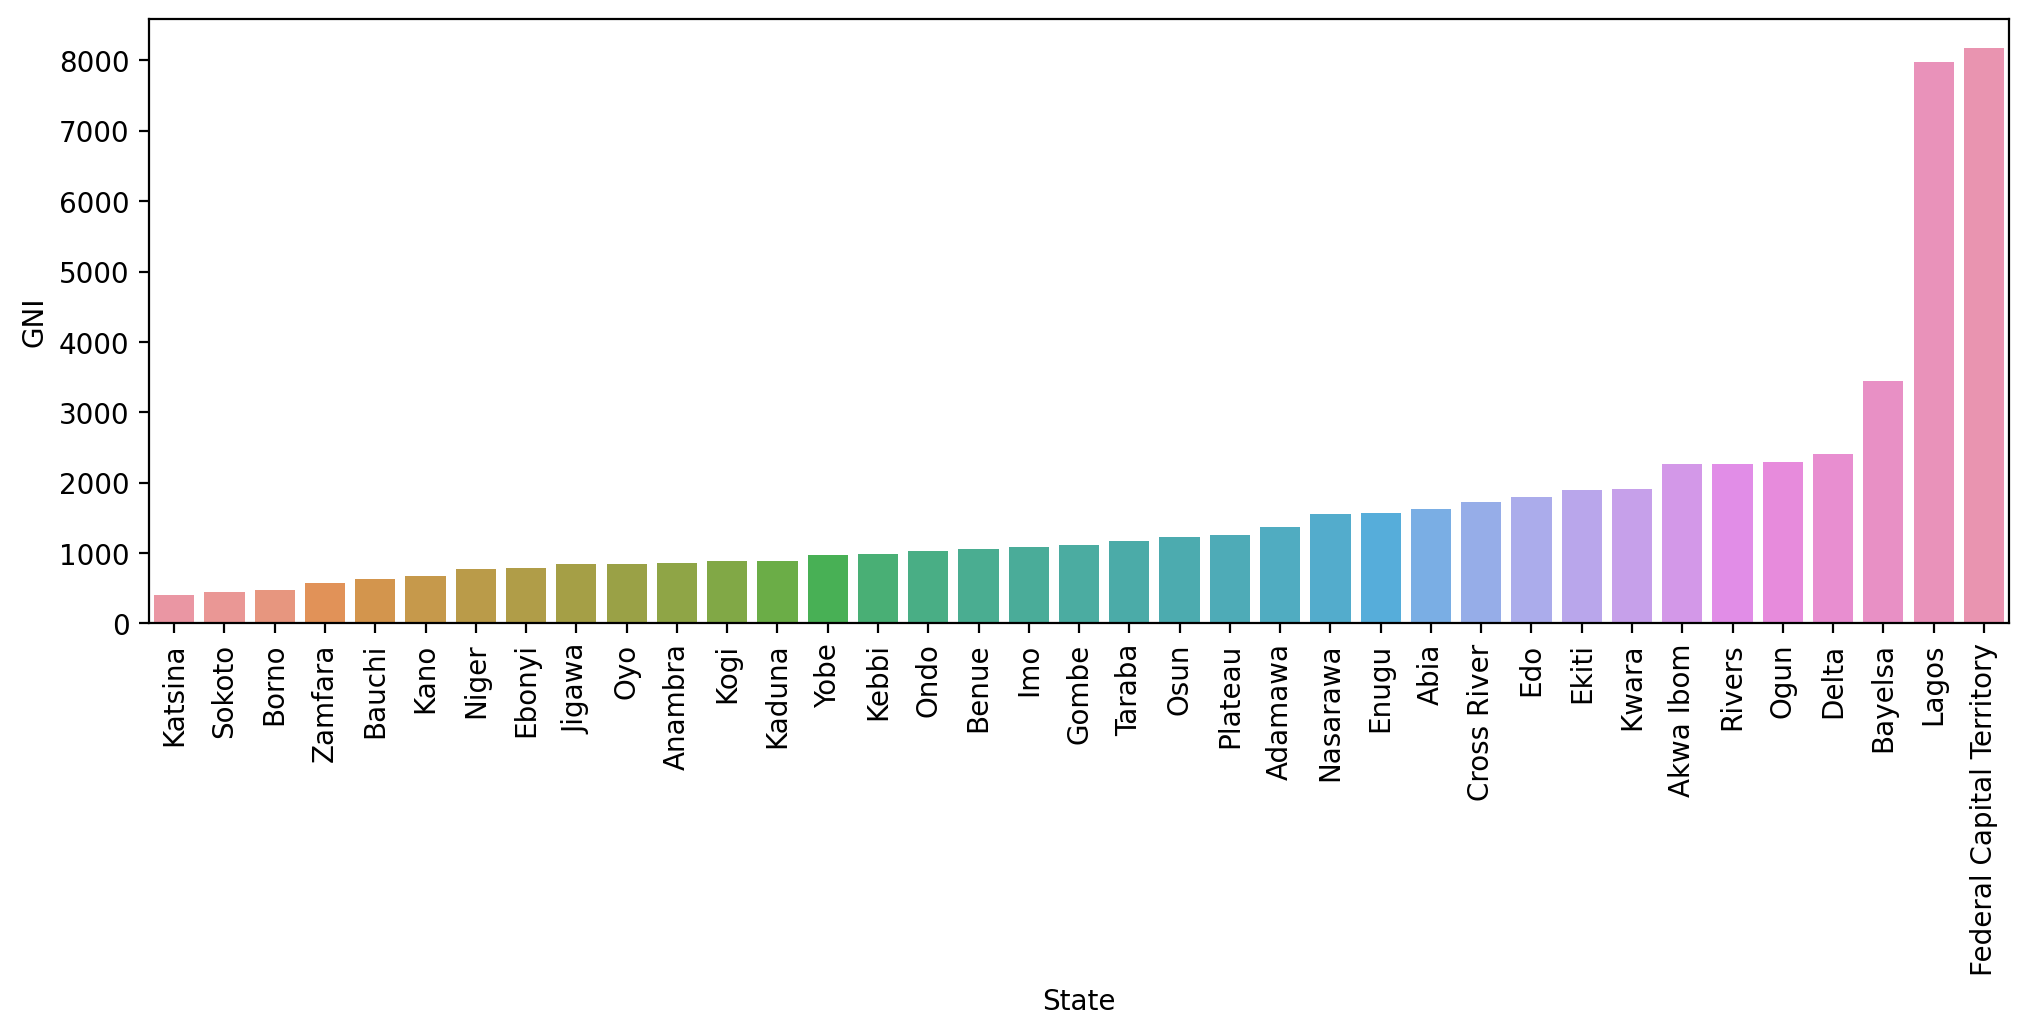

In [153]:
df = data2016.sort_values("GNI")

plt.figure(dpi=200,figsize=(12,4))

sns.barplot(data=df,x='State',y='GNI')
plt.xticks(rotation=90)
plt.show;

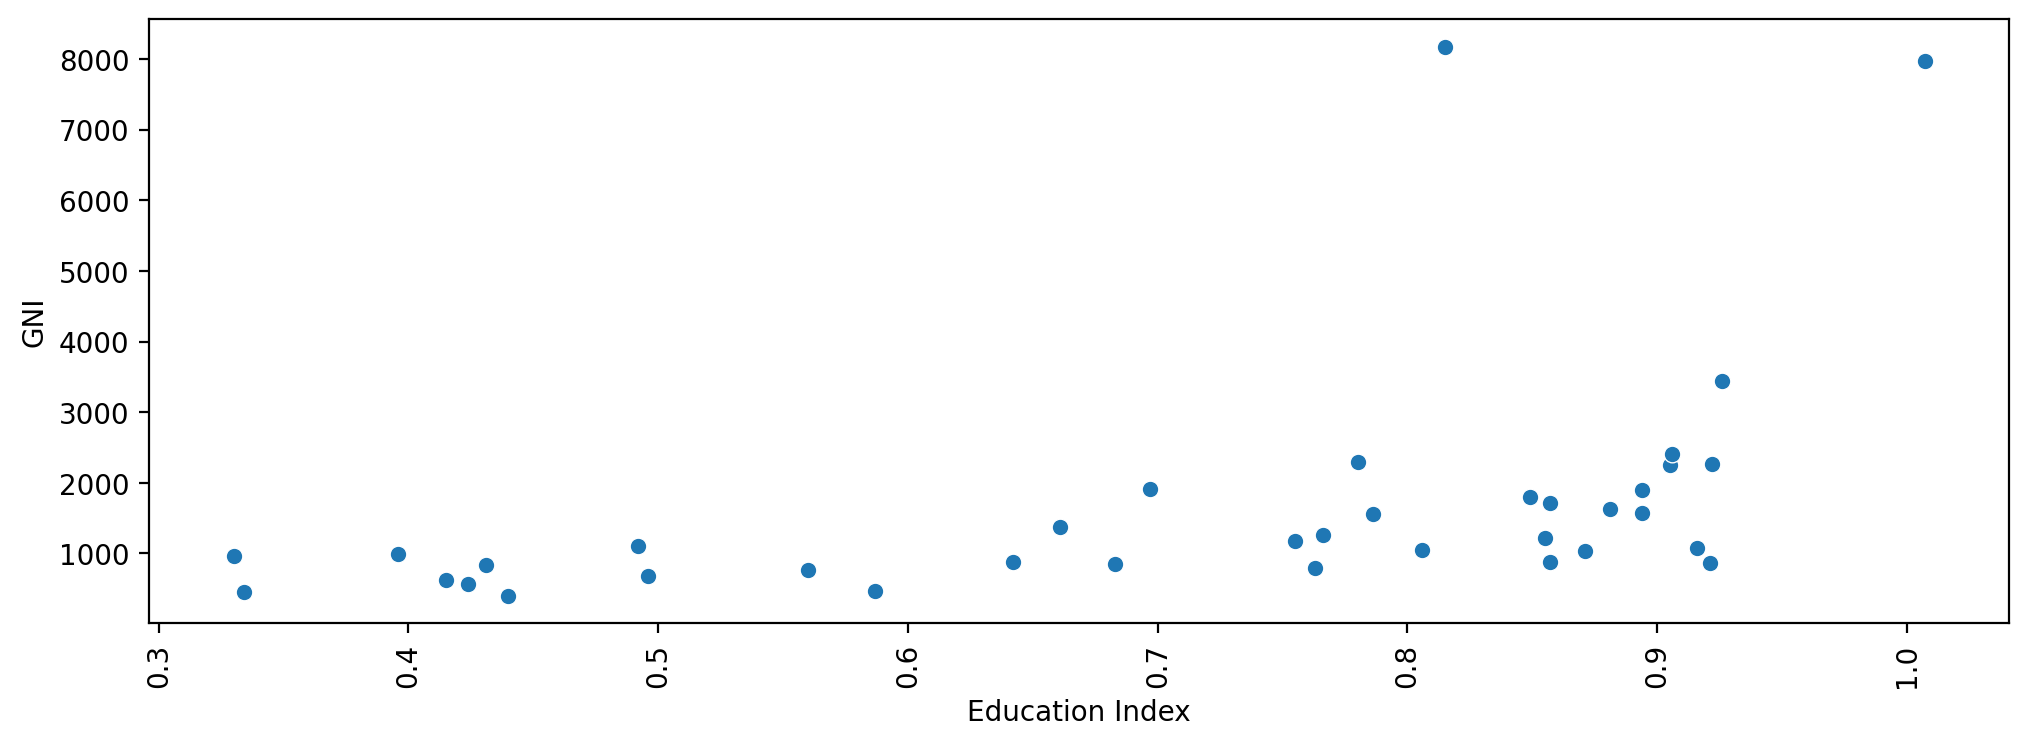

In [199]:
plt.figure(dpi=200,figsize=(12,4))

sns.scatterplot(data=data2016,x='Education Index',y='GNI')
plt.xticks(rotation=90)
plt.show;

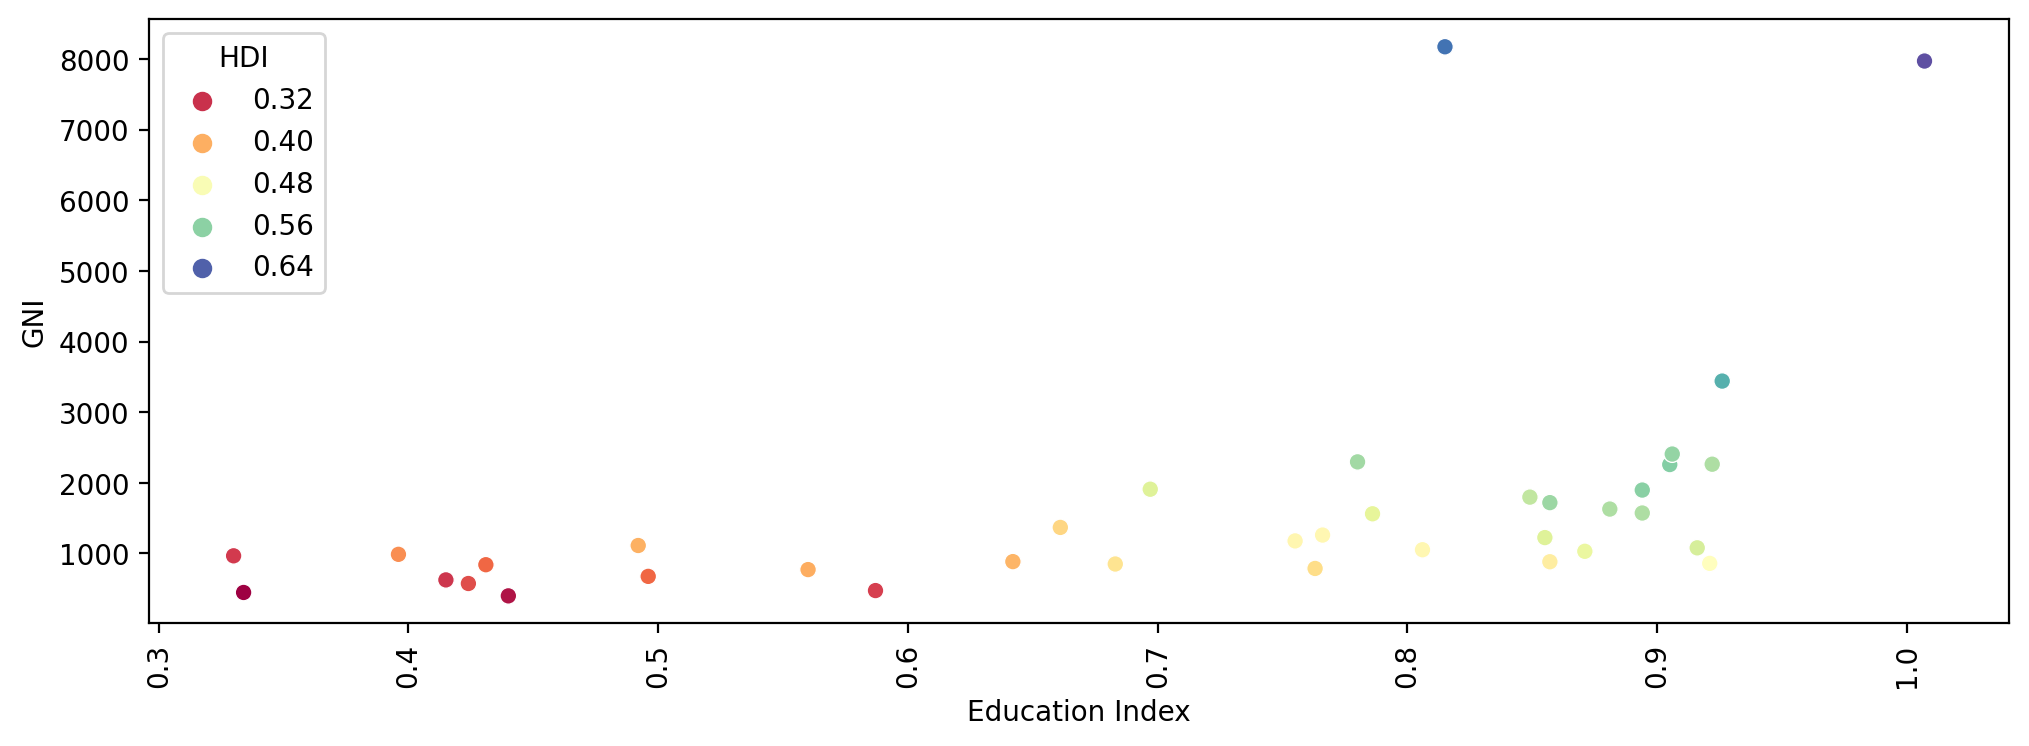

In [198]:
plt.figure(dpi=200,figsize=(12,4))

sns.scatterplot(data=data2016,x='Education Index',y='GNI',hue='HDI',palette='Spectral')
plt.xticks(rotation=90)
plt.show;

In [200]:
df[df['GNI']>3000].sort_values('GNI',ascending=False)

,State,HDI,Longevity Index,Education Index,GNI
1,Federal Capital Territory,0.629,0.506,0.815,8174
0,Lagos,0.652,0.459,1.007,7972
2,Bayelsa,0.591,0.475,0.926,3441


In [202]:
df[df['Education Index']<0.4].sort_values('GNI',ascending=False)

,State,HDI,Longevity Index,Education Index,GNI
29,Kebbi,0.382,0.506,0.396,988
34,Yobe,0.325,0.380,0.330,967
37,Sokoto,0.291,0.475,0.334,448


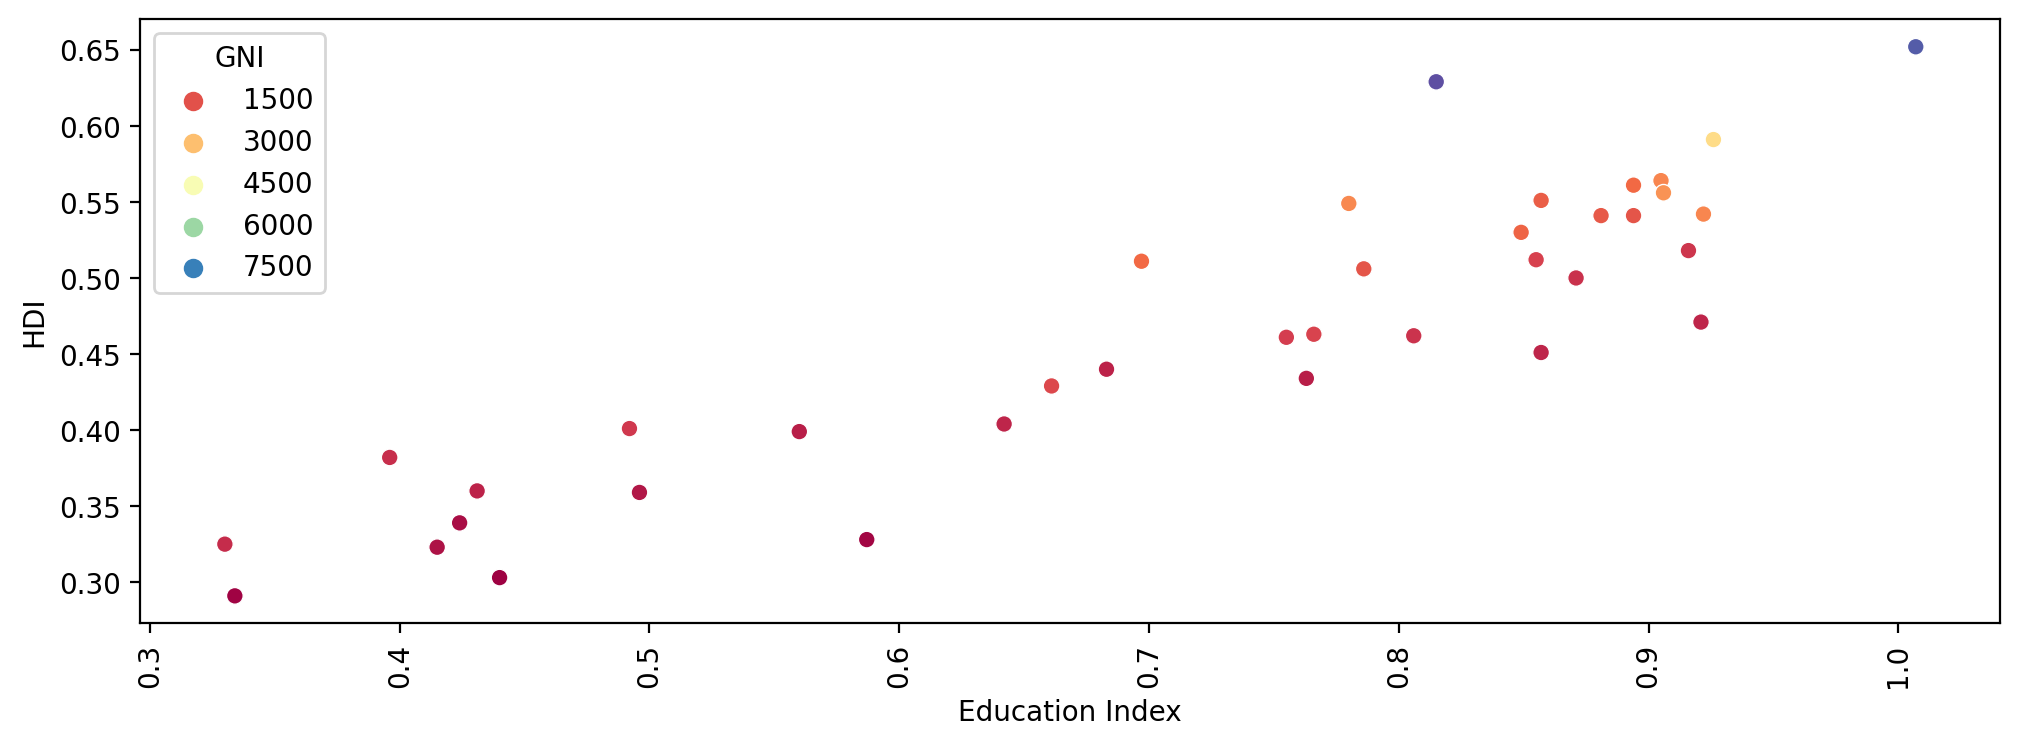

In [204]:
plt.figure(dpi=200,figsize=(12,4))

sns.scatterplot(data=data2016,x='Education Index',y='HDI',hue='GNI',palette='Spectral')
plt.xticks(rotation=90)
plt.show;

**Analysis from charts:**

There is seemingly a correlation between Education and Human Development

FCT and Lagos are outliers, with income and development outpacing all other cities in Nigeria

## Model Prediction

**We are going to use linear and logisticCV models to create a model that predicts state income**

In [258]:
#IMPORT MODELS

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#IMPORT PERF METRICS

from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_absolute_error,mean_squared_error

In [208]:
data2016.head()

,State,HDI,Longevity Index,Education Index,GNI
0,Lagos,0.652,0.459,1.007,7972
1,Federal Capital Territory,0.629,0.506,0.815,8174
2,Bayelsa,0.591,0.475,0.926,3441
3,Akwa Ibom,0.564,0.491,0.905,2259
4,Ekiti,0.561,0.522,0.894,1898


In [222]:
df = data2016.drop(4).drop('State',axis=1)

X = df.drop('GNI',axis=1)
y = df['GNI']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [224]:
#X

In [225]:
lmodel = LinearRegression()

In [226]:
lmodel.fit(X_train,y_train)

LinearRegression()

In [227]:
ypreds = lmodel.predict(X_test)

In [230]:
ypreds

array([1141.18175375, 2781.90320004,  333.29858919, 2415.71869217,
        399.65378061, 1031.18117953, 2411.26399556, 1928.48106549,
       1063.97912689, 3898.02287767, 1825.50697185])

In [231]:
y_test

20    1053
8     2264
22     883
34     967
32     575
28     772
27    1113
29     988
35     626
2     3441
30     841
Name: GNI, dtype: int64

In [233]:
mean_absolute_error(ypreds,y_test)

650.6624084674185

In [235]:
np.sqrt(mean_squared_error(ypreds,y_test))

781.305554096828

In [237]:
#accuracy_score(ypreds,y_test)

In [239]:
lmodel.predict([[0.564,0.522,0.894]])

array([2563.13958459])

In [247]:
data2016.iloc[4]['GNI']

1898

In [248]:
pd.DataFrame(data2016.iloc[4])

,4
State,Ekiti
HDI,0.561
Longevity Index,0.522
Education Index,0.894
GNI,1898


In [249]:
lmodel.coef_

array([ 38234.93327059, -14760.27033841, -12224.76909786])

In [250]:
logmodel = LogisticRegression()

In [252]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [253]:
ypreds = logmodel.predict(X_test)

In [254]:
mean_absolute_error(ypreds,y_test)

1842.4545454545455

In [255]:
np.sqrt(mean_squared_error(ypreds,y_test))

3085.343932500586

In [256]:
logmodel.predict([[0.564,0.522,0.894]])

array([7972], dtype=int64)

In [259]:
elasmodel = ElasticNet()

In [260]:
elasmodel.fit(X_train,y_train)

ElasticNet()

In [261]:
ypreds = elasmodel.predict(X_test)

In [262]:
mean_absolute_error(ypreds,y_test)

895.4986848711064

In [263]:
np.sqrt(mean_squared_error(ypreds,y_test))

941.6228862041895

In [264]:
elasmodel.predict([[0.564,0.522,0.894]])

array([1886.83999302])

In [ ]:
lmodel.predict()

In [207]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y) 

In [ ]:
# Name first variable X2 for ease

X2 = df.drop(['Churn','customerID'],axis=1)


X = pd.get_dummies(X2,drop_first=True)
y = df['Churn']

In [ ]:
#TEST DATA SPLIT; 10% set as test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
# PARAMETER SETUP

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
# TRAIN

grid.fit(X_train,y_train)

In [ ]:
# PREDICT

grid.predict(X_test)
ypreds = grid.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(grid,X_test,y_test)